In [1]:
import scipy.signal as spsig
import pytry
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
data = pd.DataFrame(pytry.read('theta15_segment'))
keys = [k for k in data.keys() for v in data[k] if k.startswith('output')]
data2={}
for j in range(len(data)):
    for k in keys:
        #del data[k][0]['time']
        a=data[k][j]['output']
        data2[k]=pd.Series([a])
    if j==0:
        data2=pd.DataFrame(data2)
        data3=data2
    else:
        data2=pd.DataFrame(data2)
        data3=data3.append(data2)
data3

,output_aimless000,output_aimless001,output_aimless002,output_aimless003,output_aimless004,output_aimless005,output_aimless006,output_aimless007,output_aimless008,output_aimless009,...,output_noplay_test008,output_noplay_test009,output_noplay_test010,output_noplay_test011,output_noplay_test012,output_noplay_test013,output_noplay_test014,output_noplay_test015,output_noplay_test016,output_noplay_train
0,"[[-0.12847936714480251], [-0.10166145633873991...","[[-0.18209624646017414], [-0.18671743799236412...","[[-0.09484264496425546], [-0.00834756362333499...","[[-0.07545200094431248], [-0.04518883407907725...","[[-0.24606279666514713], [-0.26020682325398103...","[[-0.08667363670363382], [0.024623501810113524...","[[-0.17042990602027985], [-0.1759242726707776]...","[[-0.09582191850083172], [-0.08736225607862513...","[[-0.1713923040681793], [-0.1878342302372487],...","[[-0.1167983788057495], [-0.023171417983062492...",...,"[[-0.15116864784409356], [-0.1443903824760172]...","[[-0.15726131331023252], [-0.15467007096281693...","[[-0.10534434050849817], [-0.09164532550540722...","[[-0.1136110073460665], [-0.052989995769169906...","[[-0.25704765590578504], [-0.30684789040396293...","[[-0.1625634008209645], [-0.1803747187306039],...","[[-0.2648214071142763], [-0.2709758821370569],...","[[-0.15651391480226978], [-0.12502812892390347...","[[-0.11290148601179922], [-0.10032463140358411...","[[0.1380462116057365], [0.0097465908982175], [..."
0,"[[-0.12847936714480251], [-0.10166145633873991...","[[-0.18209624646017414], [-0.18671743799236412...","[[-0.09484264496425546], [-0.00834756362333499...","[[-0.07545200094431248], [-0.04518883407907725...","[[-0.24606279666514713], [-0.26020682325398103...","[[-0.08667363670363382], [0.024623501810113524...","[[-0.17042990602027985], [-0.1759242726707776]...","[[-0.09582191850083172], [-0.08736225607862513...","[[-0.1713923040681793], [-0.1878342302372487],...","[[-0.1167983788057495], [-0.023171417983062492...",...,"[[-0.15116864784409356], [-0.1443903824760172]...","[[-0.15726131331023252], [-0.15467007096281693...","[[-0.10534434050849817], [-0.09164532550540722...","[[-0.1136110073460665], [-0.052989995769169906...","[[-0.25704765590578504], [-0.30684789040396293...","[[-0.1625634008209645], [-0.1803747187306039],...","[[-0.2648214071142763], [-0.2709758821370569],...","[[-0.15651391480226978], [-0.12502812892390347...","[[-0.11290148601179922], [-0.10032463140358411...","[[0.1380462116057365], [0.0097465908982175], [..."
0,"[[0.08656555449223285], [0.09416073284754001],...","[[0.00693118770284723], [-0.02427483483564291]...","[[0.025170080802018102], [0.009835856663067022...","[[0.056794493912675104], [0.08111798530013731]...","[[0.06308621376466234], [0.07493451547512342],...","[[0.013376064394196197], [-0.00744727764071651...","[[0.0967728588858299], [0.1423462058957959], [...","[[0.011002565563682731], [-0.01795687624831304...","[[0.039249030579015576], [0.05627921823914117]...","[[-0.04732977383545722], [-0.16796022740873465...",...,"[[-0.037419065525873596], [-0.1436149465036693...","[[0.14558641032472486], [0.16347503816098216],...","[[-0.02248930087423895], [-0.09895557649693354...","[[0.06290930277930468], [0.08802418929304173],...","[[0.10807092530254608], [0.13820300274248792],...","[[0.0843294274776818], [0.12186823443519132], ...","[[0.047883935693439905], [0.05322019070365469]...","[[0.03361026246546789], [-0.005125394346807921...","[[-0.12330121899891766], [-0.32795892200150983...","[[0.09105563990894275], [0.030542472685212374]..."
0,"[[0.2944184731123962], [0.2924126108212436], [...","[[0.30248248017101853], [0.31202547572427763],...","[[0.31794407305935657], [0.314968861912481], [...","[[0.29641942167457425], [0.2889019884244449], ...","[[0.20946123467802283], [0.09847992324585043],...","[[0.26817140232179104], [0.31637271579597415],...","[[0.2526089738118228], [0.17882939856530616], ...","[[0.303526106972016], [0.31147366114153885], [...","[[0.30867224277959504], [0.2697548687648

In [21]:
keys = [k for k in data3.keys() for v in data3[k]]
values = [v for k in data3.keys() for v in data3[k]]
data3 = pd.DataFrame.from_dict({'pattern':keys, 'output': values})
data3=data3.set_index('pattern')
data3

,output
pattern,
output_aimless000,"[[-0.12847936714480251], [-0.10166145633873991..."
output_aimless000,"[[-0.12847936714480251], [-0.10166145633873991..."
output_aimless000,"[[0.08656555449223285], [0.09416073284754001],..."
output_aimless000,"[[0.2944184731123962], [0.2924126108212436], [..."
output_aimless000,"[[-0.08729092314859355], [-0.1756945532462142]..."
output_aimless000,"[[0.8741869247106038], [0.8690405354636376], [..."
output_aimless000,"[[0.1873255235175581], [0.17705451535920025], ..."
output_aimless000,"[[0.022443628907234114], [0.032369537508603274..."
output_aimless000,"[[-0.2272378977223167], [-0.223371662760428], ..."


In [22]:
exp1 = data3[0::20]

,output
pattern,
output_aimless000,"[[-0.12847936714480251], [-0.10166145633873991..."
output_aimless001,"[[-0.18209624646017414], [-0.18671743799236412..."
output_aimless002,"[[-0.09484264496425546], [-0.00834756362333499..."
output_aimless003,"[[-0.07545200094431248], [-0.04518883407907725..."
output_aimless004,"[[-0.24606279666514713], [-0.26020682325398103..."
output_aimless005,"[[-0.08667363670363382], [0.024623501810113524..."
output_aimless006,"[[-0.17042990602027985], [-0.1759242726707776]..."
output_aimless007,"[[-0.09582191850083172], [-0.08736225607862513..."
output_aimless008,"[[-0.1713923040681793], [-0.1878342302372487],..."


Text(0.5,1,'noplay training')

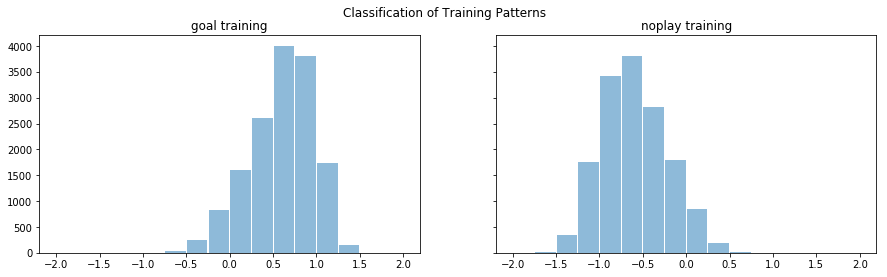

In [23]:
bins=np.arange(-2, 2 + 0.25, 0.25)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Training Patterns')
ax1.hist((np.hstack(data2.iloc[70]['output'])), bins=bins, rwidth=0.95, alpha=0.5, label='goal training')
ax1.set_title('goal training')
ax2.hist((np.hstack(data2.iloc[88]['output'])), bins=bins, rwidth=0.95, alpha=0.5, label='noplay training')
ax2.set_title('noplay training')

Text(0.5,1,'noplay training')

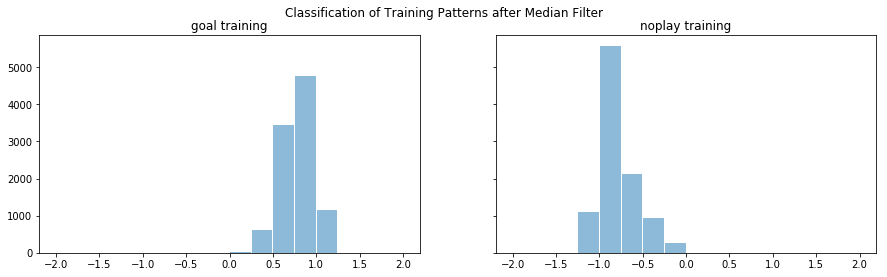

In [5]:
goal_med=spsig.medfilt((np.hstack(data2.iloc[73]['output'])),99)
noplay_med=spsig.medfilt((np.hstack(data2.iloc[92]['output'])),99)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Training Patterns after Median Filter')
ax1.hist(goal_med, bins=bins, rwidth=0.95, alpha=0.5, label='goal training')
ax1.set_title('goal training')
ax2.hist(noplay_med, bins=bins, rwidth=0.95, alpha=0.5, label='noplay training')
ax2.set_title('noplay training')

In [6]:
goal_test = [col for col in data if col.startswith('output_goal_test')]
noplay_test = [col for col in data if col.startswith('output_noplay_test')]
aimless = [col for col in data if col.startswith('output_aimless')]

In [7]:
keys = [k for k in data.keys() for v in data[k] if k.startswith('output_goal_test')]
goal_testing={}
for k in keys:
    #del data[k][0]['time']
    goal_testing[k]=data[k][0]['output']
goal_testing=pd.DataFrame([goal_testing])

keys = [k for k in goal_testing.keys() for v in goal_testing[k]]
values = [v for k in goal_testing.keys() for v in goal_testing[k]]
goal_testing = pd.DataFrame.from_dict({'pattern':keys, 'output': values})
goal_testing=goal_testing.set_index('pattern')

In [8]:
keys = [k for k in data.keys() for v in data[k] if k.startswith('output_noplay_test')]
noplay_testing={}
for k in keys:
    #del data[k][0]['time']
    noplay_testing[k]=data[k][0]['output']
noplay_testing=pd.DataFrame([noplay_testing])

keys = [k for k in noplay_testing.keys() for v in noplay_testing[k]]
values = [v for k in noplay_testing.keys() for v in noplay_testing[k]]
noplay_testing = pd.DataFrame.from_dict({'pattern':keys, 'output': values})
noplay_testing=noplay_testing.set_index('pattern')

In [15]:
keys = [k for k in data.keys() for v in data[k] if k.startswith('output_aimless')]
aimless_testing={}
for k in keys:
    #del data[k][0]['time']
    aimless_testing[k]=data[k][0]['output']
aimless_testing=pd.DataFrame([aimless_testing])

keys = [k for k in aimless_testing.keys() for v in aimless_testing[k]]
values = [v for k in aimless_testing.keys() for v in aimless_testing[k]]
aimless_testing = pd.DataFrame.from_dict({'pattern':keys, 'output': values})
aimless_testing=aimless_testing.set_index('pattern')

C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


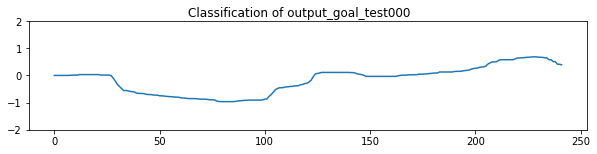

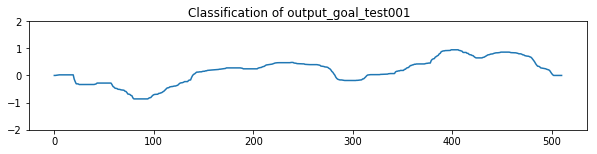

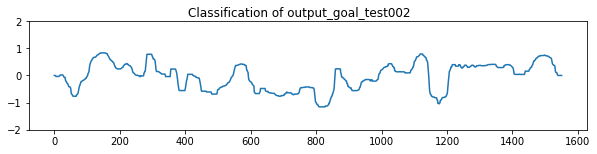

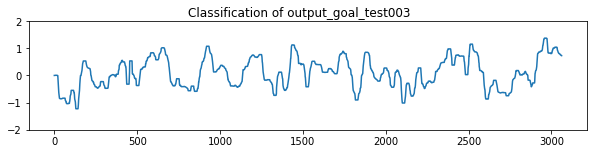

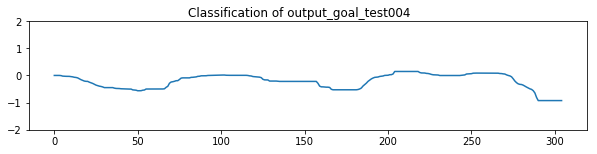

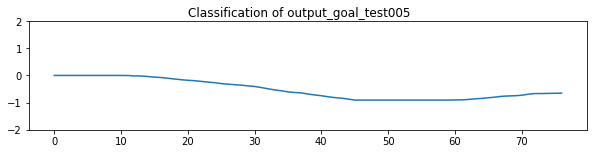

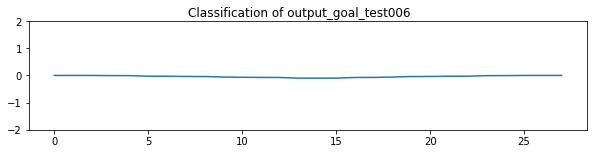

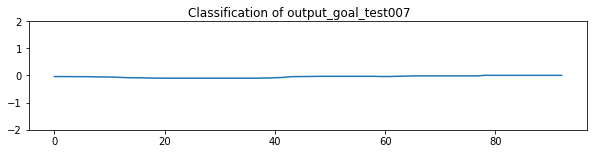

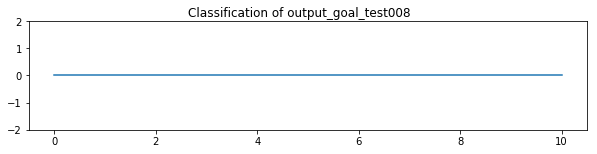

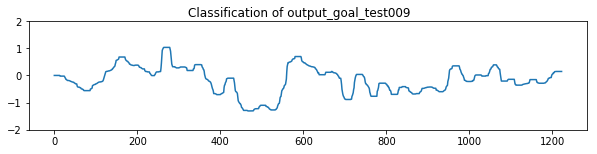

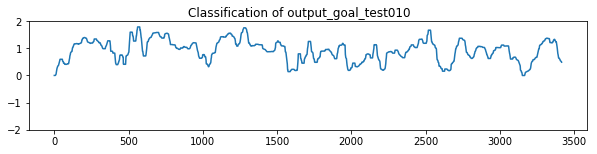

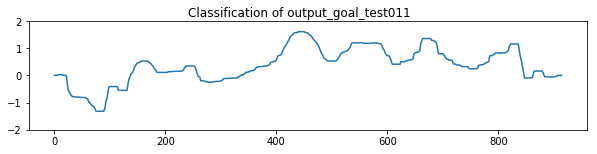

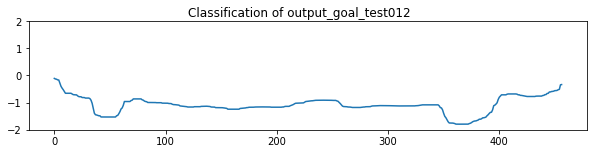

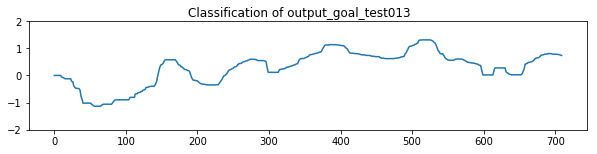

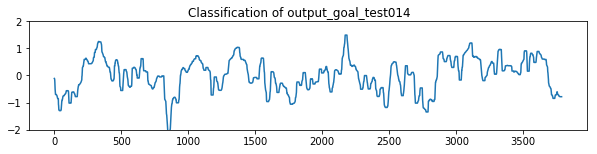

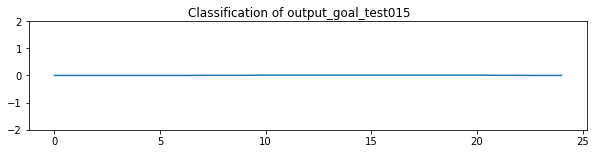

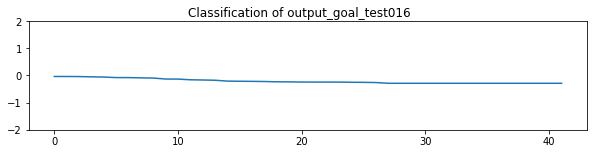

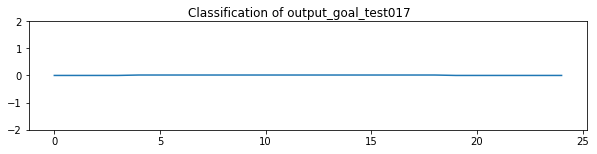

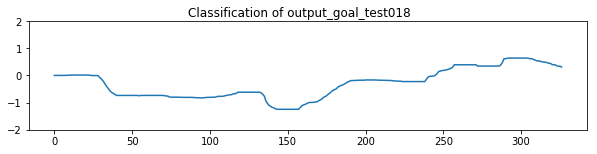

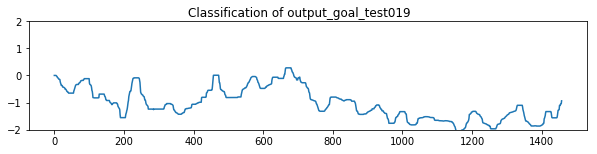

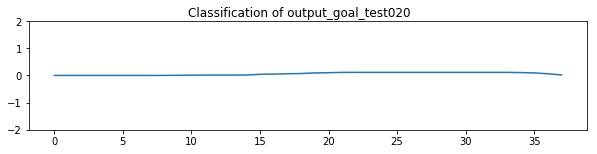

In [38]:
for r in range(len(goal_testing)):
    plt.subplots(1, 1, sharey=True, figsize=(10, 2))
    plt.suptitle('Classification of %s' % goal_testing.iloc[r].name)
    b=np.hstack(goal_testing.iloc[r]['output'])
    a=spsig.medfilt(b,29)
    #plt.hist(a, bins=bins)
    plt.plot(a)
    plt.ylim((-2,2))
plt.show()

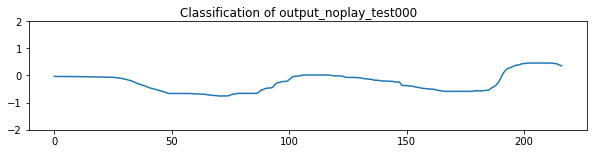

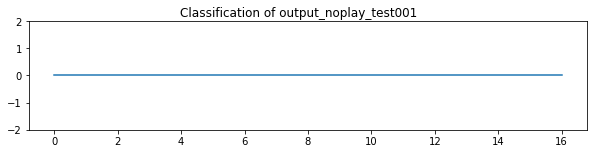

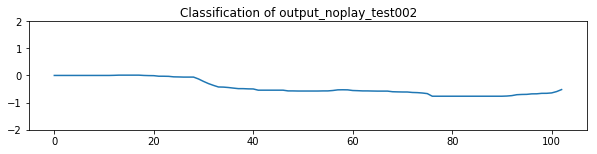

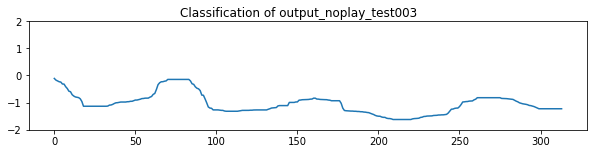

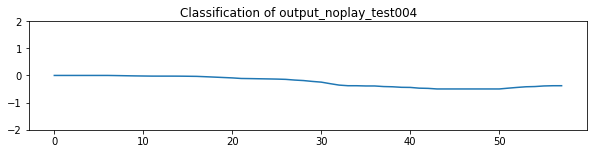

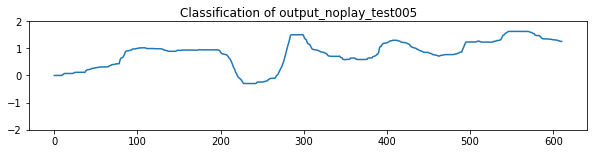

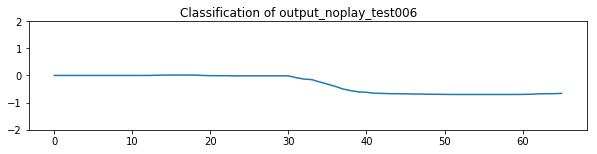

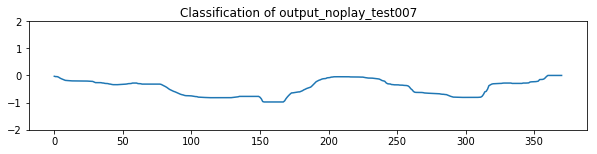

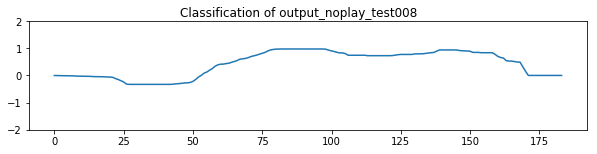

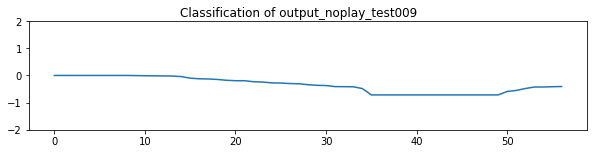

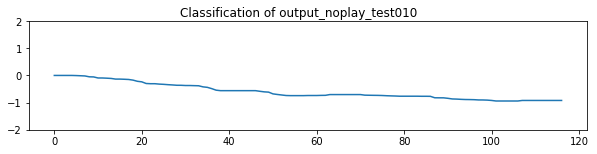

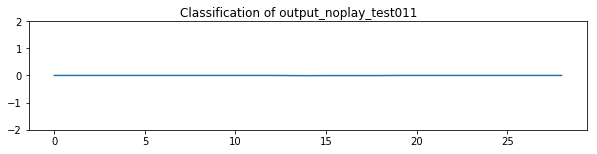

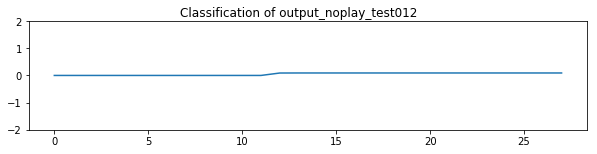

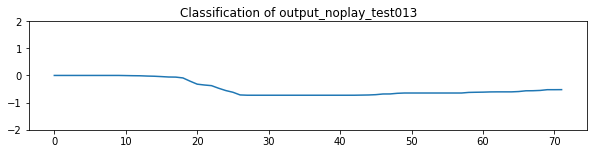

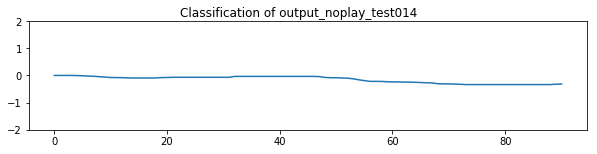

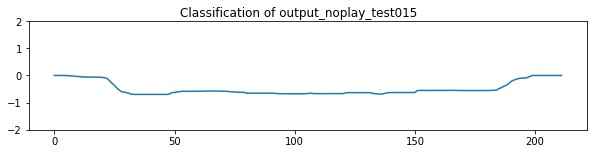

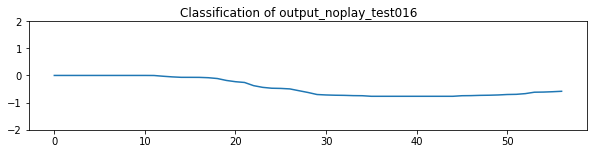

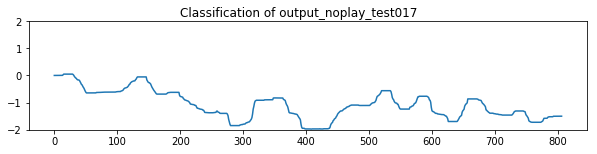

In [37]:
for r in range(len(noplay_testing)):
    plt.subplots(1, 1, sharey=True, figsize=(10, 2))
    plt.suptitle('Classification of %s' % noplay_testing.iloc[r].name)
    b=np.hstack(noplay_testing.iloc[r]['output'])
    a=spsig.medfilt(b,29)
    #plt.hist(a, bins=bins)
    plt.plot(a)
    plt.ylim((-2,2))
plt.show()

C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


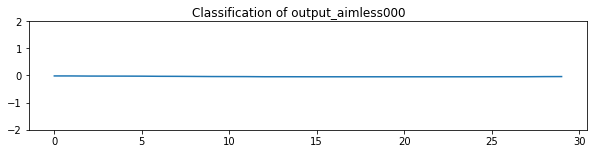

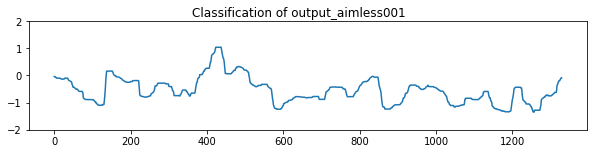

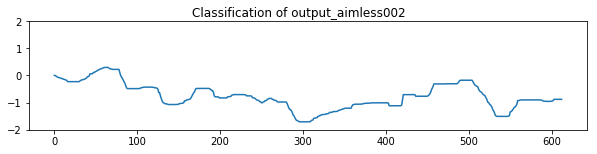

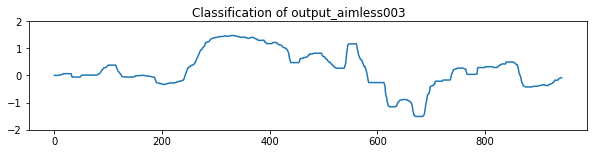

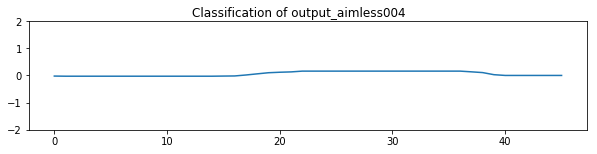

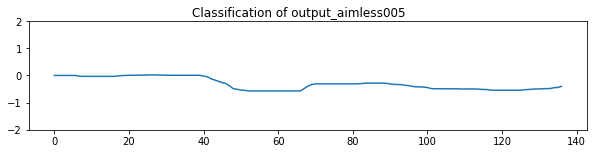

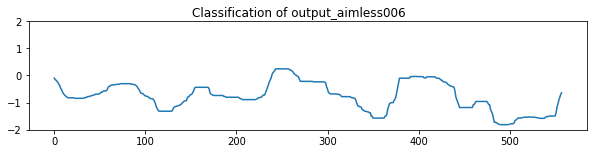

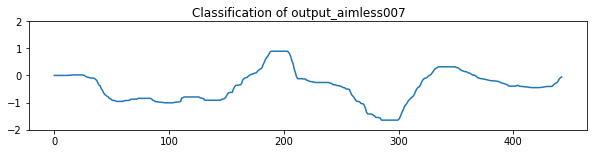

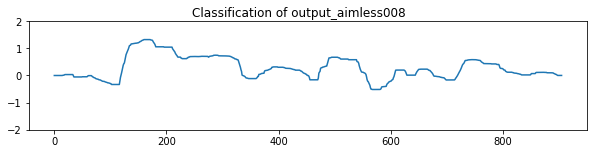

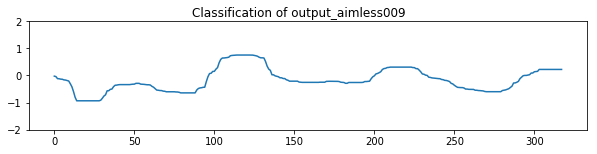

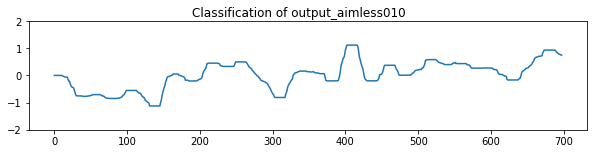

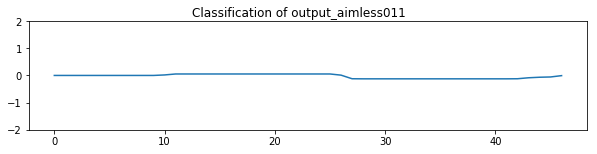

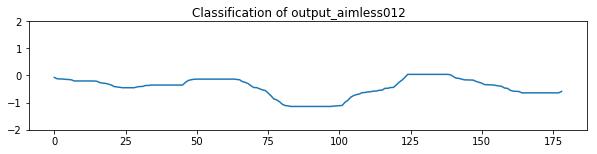

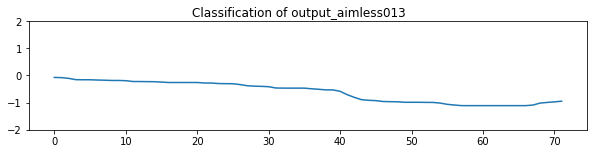

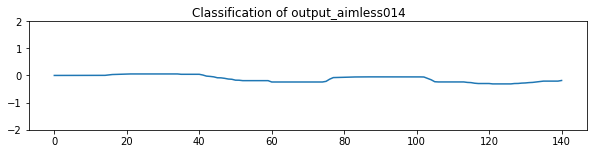

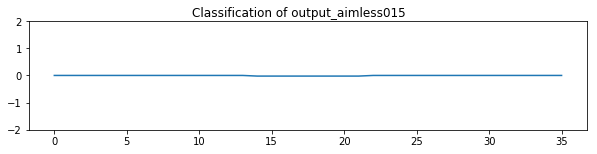

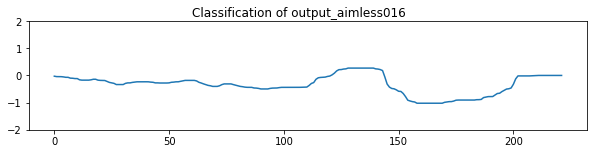

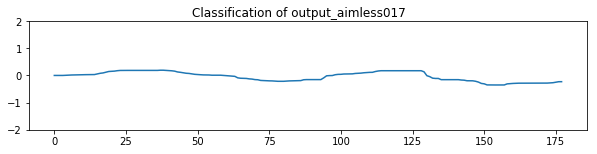

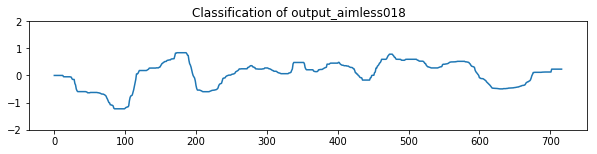

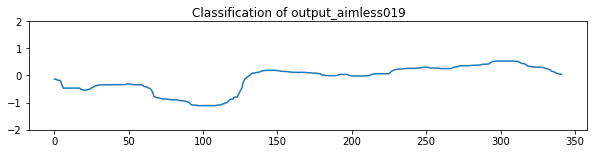

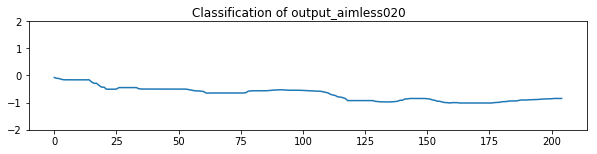

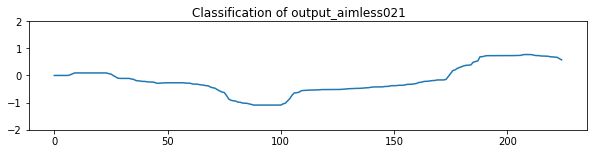

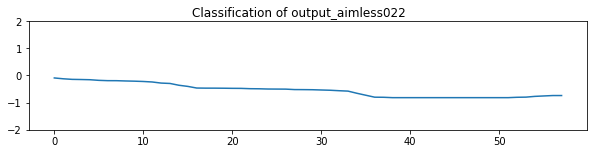

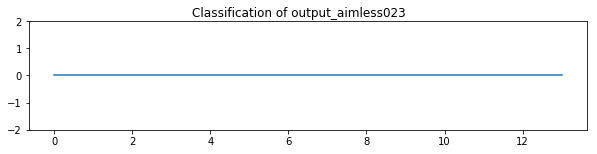

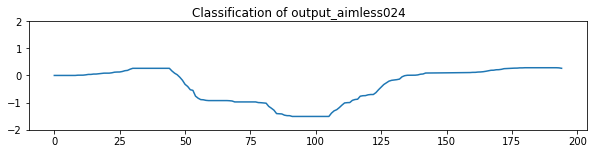

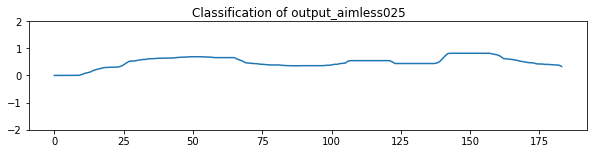

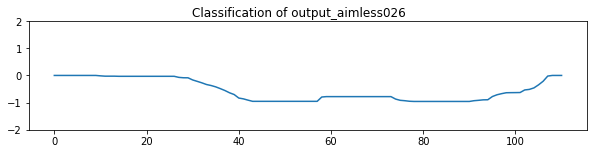

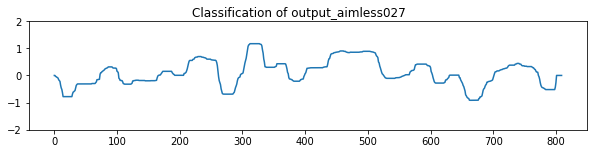

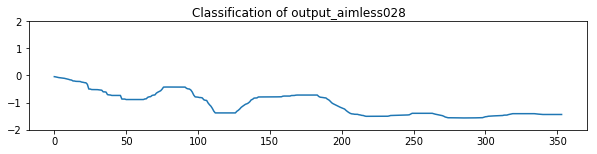

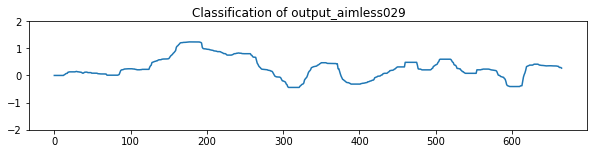

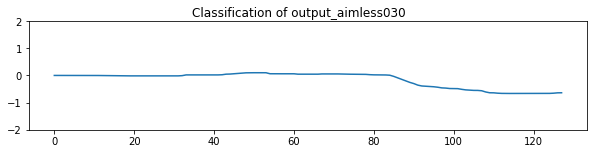

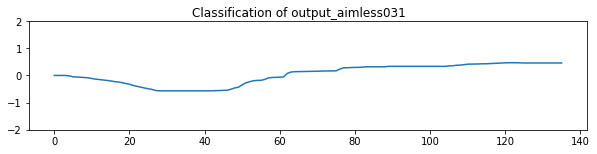

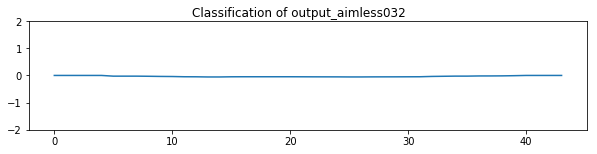

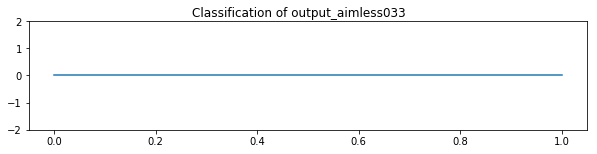

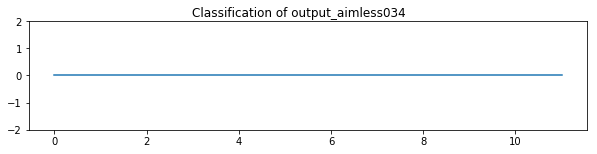

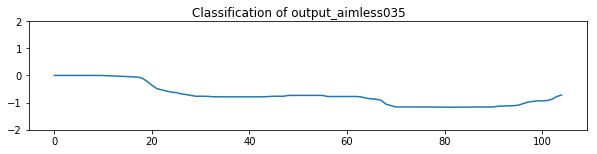

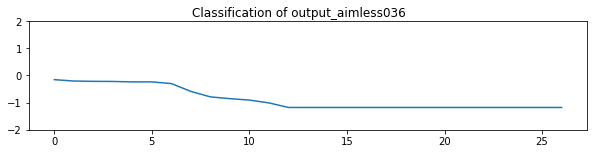

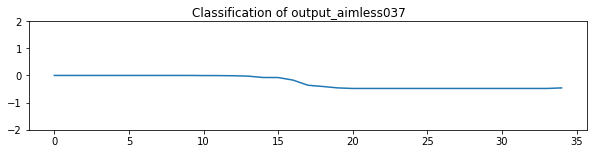

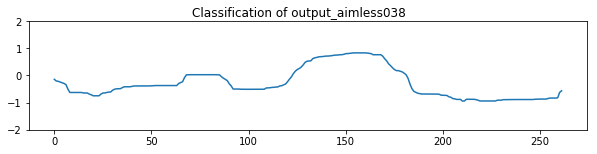

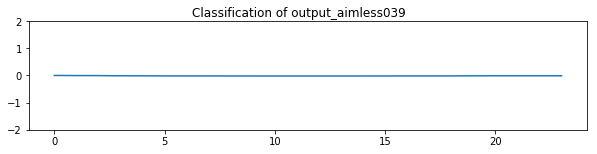

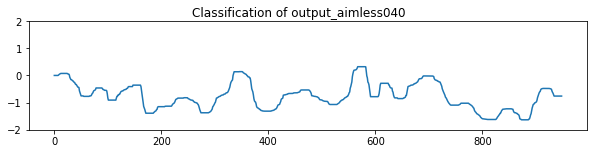

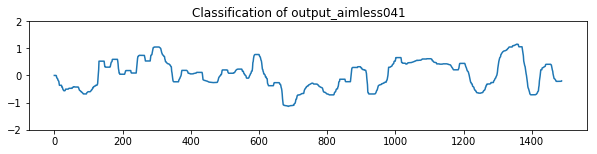

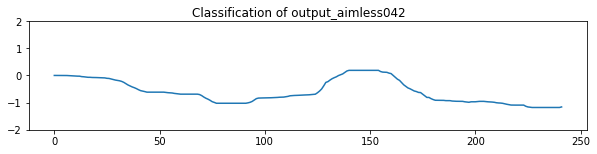

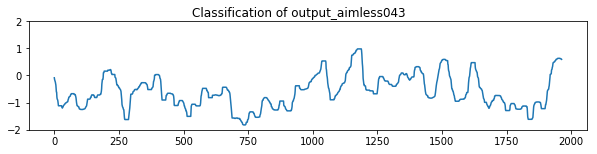

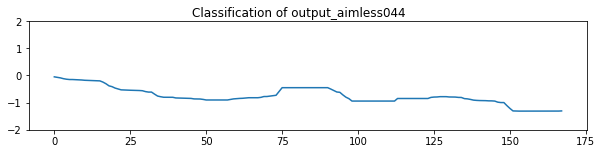

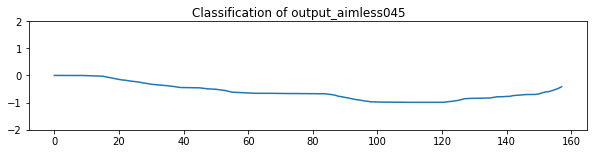

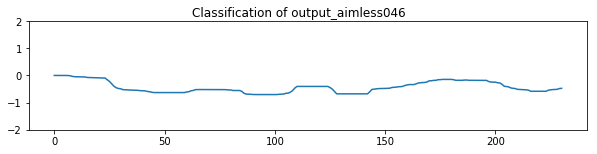

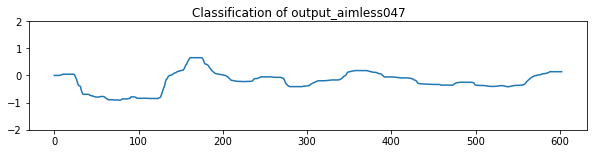

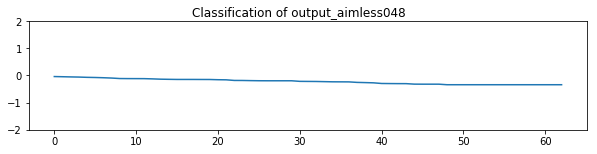

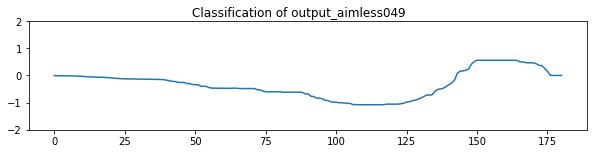

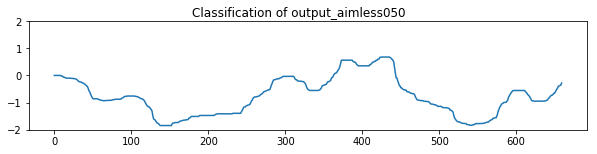

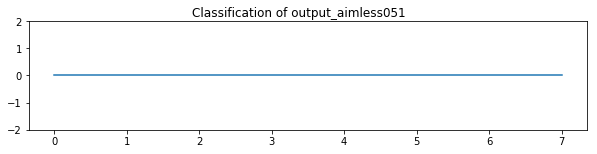

In [36]:
for r in range(len(aimless_testing)):
    plt.subplots(1, 1, sharey=True, figsize=(10, 2))
    plt.suptitle('Classification of %s' % aimless_testing.iloc[r].name)
    b=np.hstack(aimless_testing.iloc[r]['output'])
    a=spsig.medfilt(b,29)
    #plt.hist(a, bins=bins)
    plt.plot(a)
    plt.ylim((-2,2))
plt.show()